In [1]:
import sys
import os
os.chdir("..")
os.chdir("./src")
# sys.path.append("./src")

In [2]:
from IPython import display
from IPython.display import clear_output
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, jit
from time import time
# from helpers import *
from LDMIBSS import *
# np.random.seed(14)
%load_ext autoreload
%autoreload 2

In [3]:
N = 10000
NumberofSources = 5
NumberofMixtures = 10
S = generate_correlated_copula_sources(rho = 0.3, df = 4, n_sources = NumberofSources, 
                                       size_sources = N , decreasing_correlation = False)
S = 2 * S -1 
print("The following is the correlation matrix of sources")
display_matrix(np.corrcoef(S))

# Generate Mxr random mixing from i.i.d N(0,1)
A = np.random.randn(NumberofMixtures,NumberofSources)
X = np.dot(A,S)

SNR = 30
X, NoisePart = addWGN(X, SNR, return_noise = True)

SNRinp = 10 * np.log10(np.sum(np.mean((X - NoisePart)**2, axis = 1)) / np.sum(np.mean(NoisePart**2, axis = 1)))
print("The following is the mixture matrix A")
display_matrix(A)
print("Input SNR is : {}".format(SNRinp))

The following is the correlation matrix of sources


<IPython.core.display.Math object>

The following is the mixture matrix A


<IPython.core.display.Math object>

Input SNR is : 29.979690325924075


In [4]:
s_dim = S.shape[0]
x_dim = X.shape[0]
debug_iteration_point = 200
model = LDMIBSS(s_dim = s_dim, x_dim = x_dim,
                set_ground_truth = True, S = S, A = A)

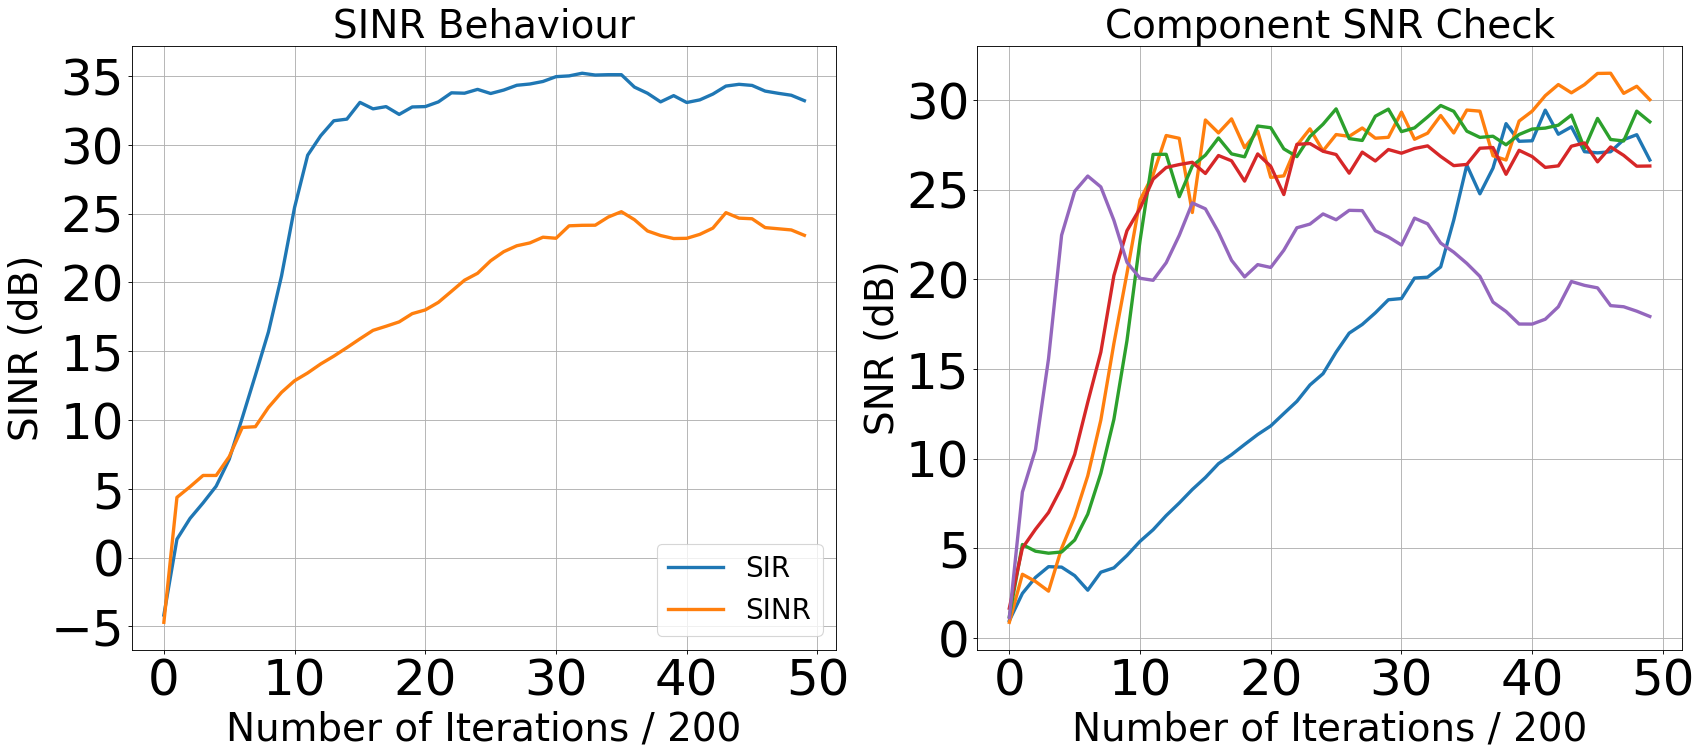

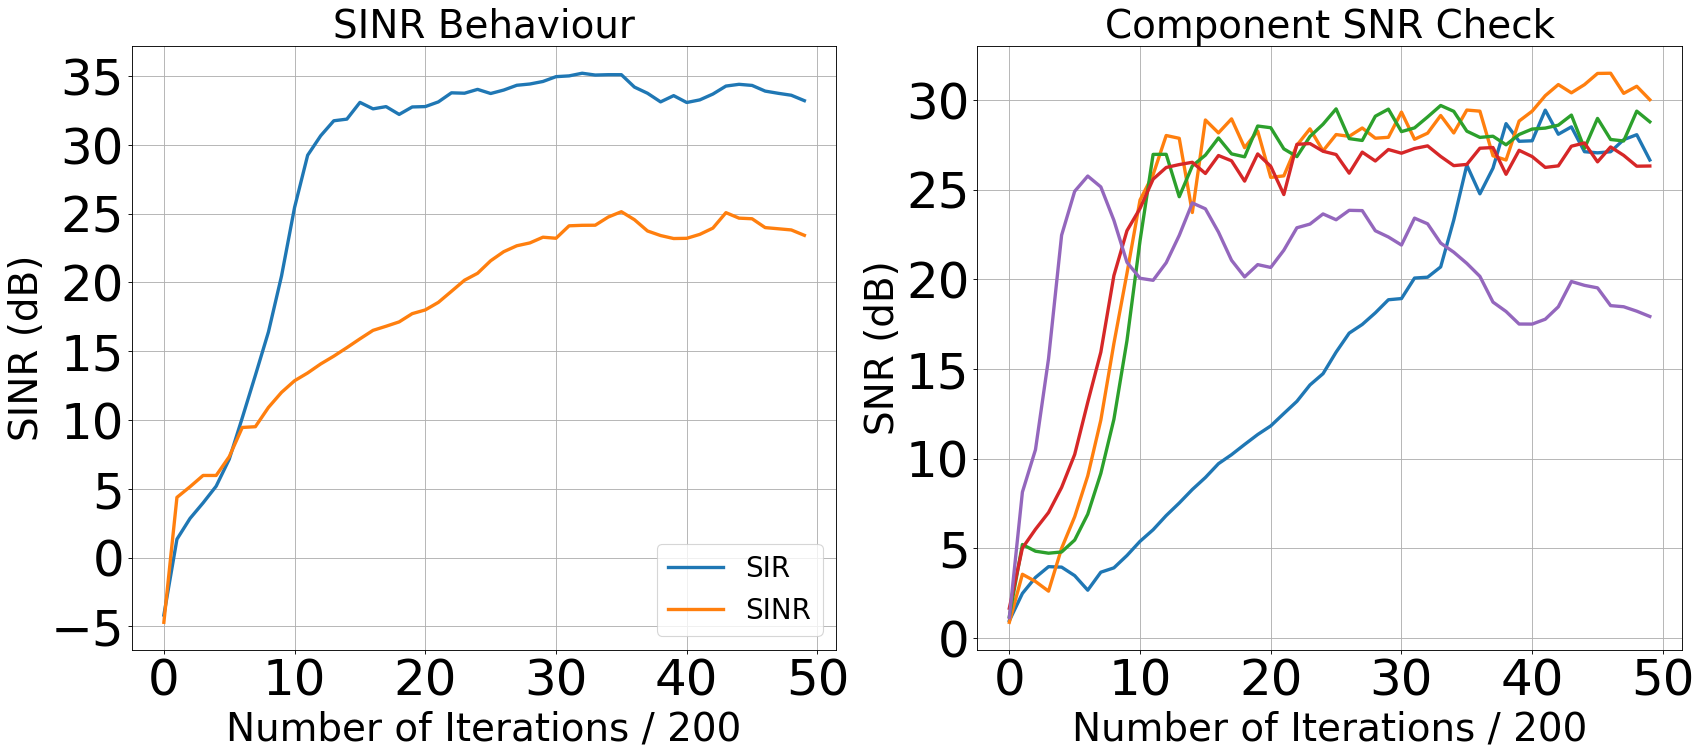

In [5]:
model.fit_batch_antisparse(X, epsilon = 1e-5, mu_start = 100, n_iterations = 10000, 
                           method = "covariance", debug_iteration_point = debug_iteration_point,
                           plot_in_jupyter = True)

In [6]:
W = model.W
Y = W @ X
10 * np.log10(CalculateSINR(Y, S)[0])

23.98778966643864

In [7]:
CalculateSIR(A,W)

(33.33120040493891, 5)

In [8]:
snr(S.T, model.signed_and_permutation_corrected_sources(S.T,Y.T))

array([27.81742898, 29.22942983, 28.35796516, 26.55843607, 16.28355419])

In [9]:
Y_ = model.signed_and_permutation_corrected_sources(S.T,Y.T)
coef_ = (Y_ * S.T).sum(axis = 0) / (Y_ * Y_).sum(axis = 0)
Y_ = coef_ * Y_
model.snr(S.T,Y_)

array([28.78178547, 30.21047911, 29.46228598, 27.21821888, 17.82961419])